# Custom dataset creation

Buat dataset custom untuk membuat model perceptron atau computer vision untuk tugas matakuliah Algoritma Deep Learning

Tujuannya adalah untuk mengambil subset dari dataset agar tidak selalu besar sebagai dataset untuk model computer vision.

Versi ini menggunakan Pytorch

Ttd : Muhamad Ibnu Khaidar Hafiz - 50421867 - 4IA15 - 2024

In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transform

# setup data directory
import pathlib
data_dir = pathlib.Path('../data')

In [3]:
train_data = datasets.Food101(root=data_dir,
                              split='train',
                              download=True)

test_data = datasets.Food101(root=data_dir,
                             split='test',
                             download=True)

100%|██████████| 4996278331/4996278331 [02:35<00:00, 32033906.38it/s]


Extracting ../data/food-101.tar.gz to ../data


In [4]:
train_data, test_data

(Dataset Food101
     Number of datapoints: 75750
     Root location: ../data
     split=train,
 Dataset Food101
     Number of datapoints: 25250
     Root location: ../data
     split=test)

In [5]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


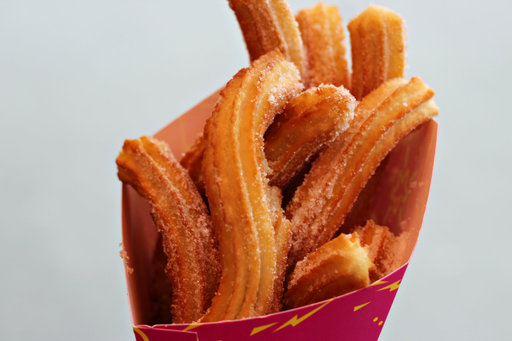

In [6]:
print(class_names[train_data[0][1]])
train_data[150][0]

In [7]:
import random

data_path = data_dir / 'food-101' / 'images'
target_classes = ['donuts', 'french_fries'pizza']

ambil_jumlah_gambar = 1

In [8]:
!ls '../data/food-101/images'

apple_pie	    crab_cakes		     gyoza		    poutine
baby_back_ribs	    creme_brulee	     hamburger		    prime_rib
baklava		    croque_madame	     hot_and_sour_soup	    pulled_pork_sandwich
beef_carpaccio	    cup_cakes		     hot_dog		    ramen
beef_tartare	    deviled_eggs	     huevos_rancheros	    ravioli
beet_salad	    donuts		     hummus		    red_velvet_cake
beignets	    dumplings		     ice_cream		    risotto
bibimbap	    edamame		     lasagna		    samosa
bread_pudding	    eggs_benedict	     lobster_bisque	    sashimi
breakfast_burrito   escargots		     lobster_roll_sandwich  scallops
bruschetta	    falafel		     macaroni_and_cheese    seaweed_salad
caesar_salad	    filet_mignon	     macarons		    shrimp_and_grits
cannoli		    fish_and_chips	     miso_soup		    spaghetti_bolognese
caprese_salad	    foie_gras		     mussels		    spaghetti_carbonara
carrot_cake	    french_fries	     nachos		    spring_rolls
ceviche		    french_onion_soup	     omelette		    steak
cheesecake	    french_toas

In [9]:
def get_subset(image_path=data_path,
               data_splits=['train','test'],
               target_classes=target_classes,
               amount=ambil_jumlah_gambar):
    label_splits = {}

    # get label
    for data_split in data_splits:
        print(f'[INFO] Membuat image split untuk :{data_split}')
        label_path = data_dir / 'food-101' / 'meta' / f'{data_split}.txt'
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

In [10]:
label_splits = get_subset(amount=ambil_jumlah_gambar)
label_splits['train'][:10]

[INFO] Membuat image split untuk :train
[INFO] Getting random subset of 2250 images for train...
[INFO] Membuat image split untuk :test
[INFO] Getting random subset of 750 images for test...


[PosixPath('../data/food-101/images/french_fries/391896.jpg'),
 PosixPath('../data/food-101/images/french_fries/3656250.jpg'),
 PosixPath('../data/food-101/images/french_fries/2369424.jpg'),
 PosixPath('../data/food-101/images/donuts/1282656.jpg'),
 PosixPath('../data/food-101/images/donuts/2249805.jpg'),
 PosixPath('../data/food-101/images/pizza/2885050.jpg'),
 PosixPath('../data/food-101/images/french_fries/3835129.jpg'),
 PosixPath('../data/food-101/images/french_fries/3437480.jpg'),
 PosixPath('../data/food-101/images/pizza/866834.jpg'),
 PosixPath('../data/food-101/images/french_fries/1776346.jpg')]

In [12]:
target_dir_name = f'../data/custom3class{str(int(ambil_jumlah_gambar*100))}_persen'
print(f'Membuat folder: {target_dir_name}')

target_dir = pathlib.Path(target_dir_name)

target_dir.mkdir(parents=True, exist_ok=True)

Membuat folder: ../data/custom3class100_persen


In [13]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f'[INFO] Copy {image_path} ke {dest_dir}...')
        shutil.copy2(image_path, dest_dir)

[INFO] Copy ../data/food-101/images/french_fries/391896.jpg ke ../data/custom3class100_persen/train/french_fries/391896.jpg...
[INFO] Copy ../data/food-101/images/french_fries/3656250.jpg ke ../data/custom3class100_persen/train/french_fries/3656250.jpg...
[INFO] Copy ../data/food-101/images/french_fries/2369424.jpg ke ../data/custom3class100_persen/train/french_fries/2369424.jpg...
[INFO] Copy ../data/food-101/images/donuts/1282656.jpg ke ../data/custom3class100_persen/train/donuts/1282656.jpg...
[INFO] Copy ../data/food-101/images/donuts/2249805.jpg ke ../data/custom3class100_persen/train/donuts/2249805.jpg...
[INFO] Copy ../data/food-101/images/pizza/2885050.jpg ke ../data/custom3class100_persen/train/pizza/2885050.jpg...
[INFO] Copy ../data/food-101/images/french_fries/3835129.jpg ke ../data/custom3class100_persen/train/french_fries/3835129.jpg...
[INFO] Copy ../data/food-101/images/french_fries/3437480.jpg ke ../data/custom3class100_persen/train/french_fries/3437480.jpg...
[INFO] C

In [14]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/custom3class100_persen'.
There are 3 directories and 0 images in '../data/custom3class100_persen/test'.
There are 0 directories and 250 images in '../data/custom3class100_persen/test/donuts'.
There are 0 directories and 250 images in '../data/custom3class100_persen/test/french_fries'.
There are 0 directories and 250 images in '../data/custom3class100_persen/test/pizza'.
There are 3 directories and 0 images in '../data/custom3class100_persen/train'.
There are 0 directories and 750 images in '../data/custom3class100_persen/train/donuts'.
There are 0 directories and 750 images in '../data/custom3class100_persen/train/french_fries'.
There are 0 directories and 750 images in '../data/custom3class100_persen/train/pizza'.


In [15]:
zip_file_name = data_dir / f'custom3class{str(int(ambil_jumlah_gambar*100))}_persen'
shutil.make_archive(zip_file_name,
                    format='zip',
                    root_dir=target_dir)

'/data/custom3class100_persen.zip'

In [16]:
!ls ../data

custom10class100_persen  custom3class100_persen.zip  food-101.tar.gz
custom3class100_persen	 food-101


In [17]:
!ls -lh ../data/

total 4.8G
drwxr-xr-x 2 root root 4.0K Oct 20 11:43 custom10class100_persen
drwxr-xr-x 4 root root 4.0K Oct 20 11:43 custom3class100_persen
-rw-r--r-- 1 root root 150M Oct 20 11:44 custom3class100_persen.zip
drwxr-xr-x 4 3156  320 4.0K Jul  9  2014 food-101
-rw-r--r-- 1 root root 4.7G Oct 20 11:40 food-101.tar.gz


In [18]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [19]:
!mv ../data/custom3class100_persen.zip /gdrive/MyDrive/Custom_dataset/

In [20]:
!ls /gdrive/MyDrive/Custom_dataset/

custom10class100_persen.zip  custom3class100_persen.zip


After executing the cell above, a new file named 'Sample file.txt' will appear in your [drive.google.com](https://drive.google.com/) file list.

In [ ]:
!wget -qO- cli.runpod.net | sudo bash

Installing runpodctl...
jq is not installed.
Installing jq...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,032 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Ign:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,200 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ub

In [ ]:
!runpodctl send ../data/custom10class100_persen.zip

4006-compact-heaven-laptop-8
Sending 'custom10class100_persen.zip' (433.7 MB)
Code is: 4006-compact-heaven-laptop-8
On the other computer run

runpodctl receive 4006-compact-heaven-laptop-8

Sending (->35.237.104.48:57258)
custom10class100_persen.zip 100% |████████████████████| (434/434 MB, 64.686 MB/s)
